<a href="https://colab.research.google.com/github/PoilenkovaAnna/BCI_EEG_EMG/blob/main/phonemes_eda%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
import numpy as np

import json

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_DTW_6AR.csv'

dataset = pd.read_csv(file_)

In [ ]:
dataset

,person_id,label_phoneme,sector_id,channel,DTW_1_AR1,DTW_1_AR2,DTW_1_AR3,DTW_1_AR4,DTW_1_AR5,DTW_1_AR6,...,DTW_3_MAD,DTW_3_STD,DTW_4_AR1,DTW_4_AR2,DTW_4_AR3,DTW_4_AR4,DTW_4_AR5,DTW_4_AR6,DTW_4_MAD,DTW_4_STD
0,0,4,0,EEG F7-A1,-3.689450e-08,2.186456,-0.894568,-0.844046,0.507204,0.042892,...,0.000018,0.000025,-0.000014,0.716037,-0.381325,0.362150,-0.126850,0.175612,0.000024,0.000034
1,0,4,0,EEG F3-A1,-5.260221e-08,2.246774,-1.024776,-0.801961,0.571102,0.006034,...,0.000014,0.000024,-0.000037,0.505876,-0.249766,0.346710,-0.107789,-0.188188,0.000021,0.000033
2,0,4,0,EEG T3-A1,-1.382687e-07,2.002525,-0.593704,-0.676793,-0.000371,0.264149,...,0.000012,0.000019,-0.000054,0.721968,-0.677282,0.401750,-0.179302,0.157451,0.000013,0.000026
3,0,4,0,EEG C3-A1,-1.247779e-08,2.226526,-1.124454,-0.433423,0.185079,0.143267,...,0.000016,0.000023,-0.000010,0.353688,-0.065376,0.275980,0.070757,-0.209499,0.000021,0.000032
4,0,1,1,EEG F7-A1,-5.337635e-08,2.250257,-1.131818,-0.568255,0.396929,0.049984,...,0.000013,0.000019,-0.000024,0.639712,-0.329979,-0.047168,0.059265,0.174101,0.000019,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,5,2,181,EEG C3-A1,-4.254924e-08,1.759820,-0.144382,-0.635197,-0.419481,0.434667,...,0.000015,0.000020,-0.000007,1.354093,-1.194824,0.587028,-0.179303,0.131719,0.000023,0.000029
3664,5,6,182,EEG F7-A1,2.056282e-08,1.829906,-0.187177,-0.912369,-0.062439,0.329629,...,0.000011,0.000016,0.000006,1.017506,-0.554406,0.317738,-0.263076,0.265990,0.000015,0.000022
3665,5,6,182,EEG F3-A1,8.168804e-09,1.871416,-0.398818,-0.465178,-0.451048,0.440219,...,0.000019,0.000025,0.000003,1.159849,-0.905658,0.393132,-0.280636,0.240837,0.000027,0.000034
3666,5,6,182,EEG T3-A1,3.194917e-07,1.798532,-0.206250,-0.764142,-0.144359,0.312317,...,0.000018,0.000021,0.000042,1.078611,-0.866535,0.484607,-0.247190,0.384268,0.000025,0.000032


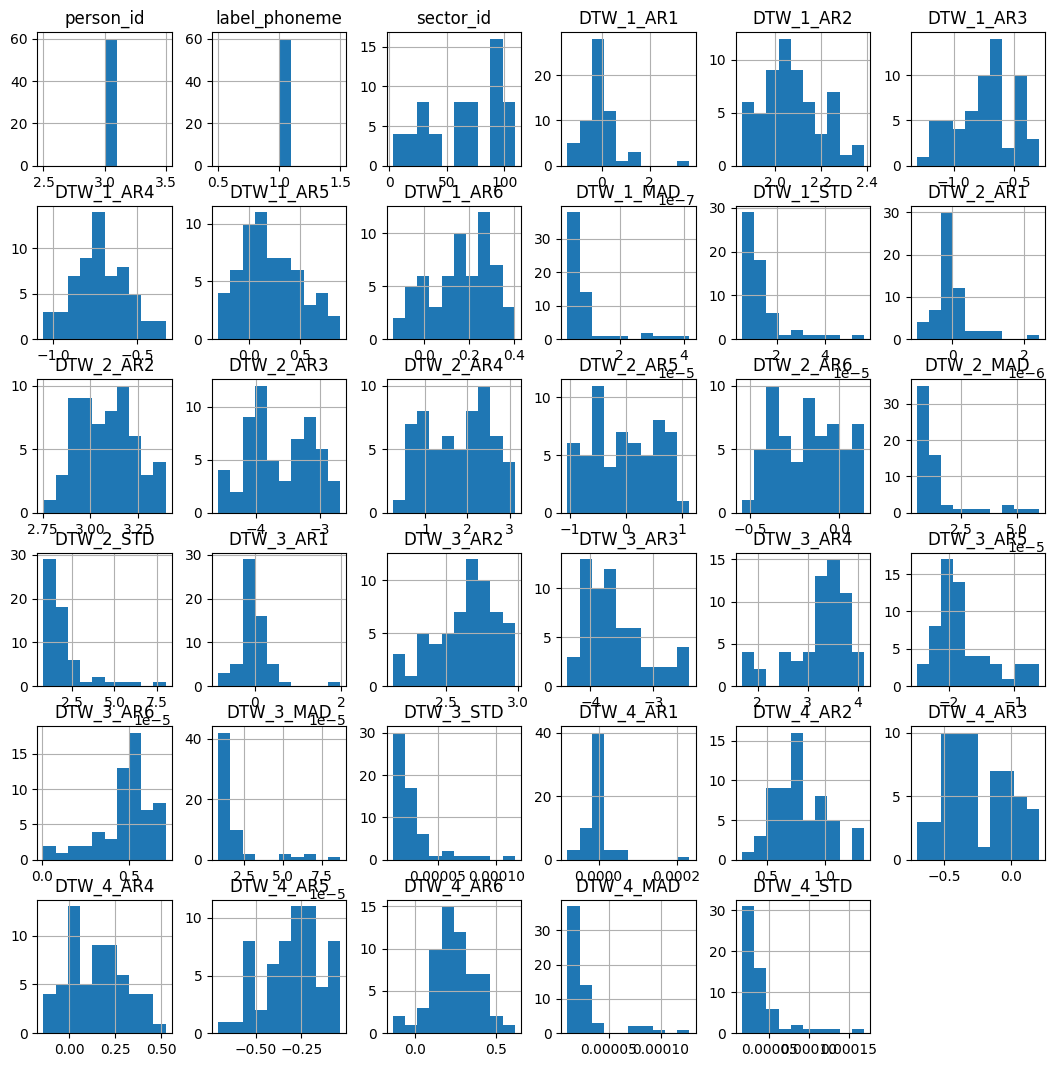

In [ ]:
dataset.query('person_id == 3').query('label_phoneme == 1').hist(figsize=(13,13))
plt.show()

In [ ]:
dataset.query('person_id == 0')

,person_id,label_phoneme,sector_id,channel,DTW_1_AR1,DTW_1_AR2,DTW_1_AR3,DTW_1_AR4,DTW_1_AR5,DTW_1_AR6,...,DTW_3_MAD,DTW_3_STD,DTW_4_AR1,DTW_4_AR2,DTW_4_AR3,DTW_4_AR4,DTW_4_AR5,DTW_4_AR6,DTW_4_MAD,DTW_4_STD
0,0,4,0,EEG F7-A1,-3.689450e-08,2.186456,-0.894568,-0.844046,0.507204,0.042892,...,0.000018,0.000025,-1.361710e-05,0.716037,-0.381325,0.362150,-0.126850,0.175612,0.000024,0.000034
1,0,4,0,EEG F3-A1,-5.260221e-08,2.246774,-1.024776,-0.801961,0.571102,0.006034,...,0.000014,0.000024,-3.698132e-05,0.505876,-0.249766,0.346710,-0.107789,-0.188188,0.000021,0.000033
2,0,4,0,EEG T3-A1,-1.382687e-07,2.002525,-0.593704,-0.676793,-0.000371,0.264149,...,0.000012,0.000019,-5.429454e-05,0.721968,-0.677282,0.401750,-0.179302,0.157451,0.000013,0.000026
3,0,4,0,EEG C3-A1,-1.247779e-08,2.226526,-1.124454,-0.433423,0.185079,0.143267,...,0.000016,0.000023,-9.534889e-06,0.353688,-0.065376,0.275980,0.070757,-0.209499,0.000021,0.000032
4,0,1,1,EEG F7-A1,-5.337635e-08,2.250257,-1.131818,-0.568255,0.396929,0.049984,...,0.000013,0.000019,-2.350681e-05,0.639712,-0.329979,-0.047168,0.059265,0.174101,0.000019,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0,1,171,EEG C3-A1,2.499062e-09,1.864000,-0.281465,-0.749708,-0.203841,0.369365,...,0.000021,0.000027,8.754854e-08,1.344045,-1.178834,0.858074,-0.265305,0.144301,0.000026,0.000037
688,0,6,172,EEG F7-A1,2.469448e-08,2.055284,-0.634451,-0.860276,0.271131,0.166513,...,0.000011,0.000023,1.296165e-05,0.872107,-0.332223,0.477263,-0.174051,-0.211526,0.000015,0.000031
689,0,6,172,EEG F3-A1,-4.841759e-09,2.111677,-0.764280,-0.792403,0.310242,0.133087,...,0.000016,0.000026,-3.153439e-06,0.932802,-0.417720,0.339080,-0.160604,-0.044727,0.000023,0.000035
690,0,6,172,EEG T3-A1,-9.313073e-10,1.850110,-0.365791,-0.583134,-0.290155,0.386477,...,0.000013,0.000016,2.015838e-08,0.974899,-0.316761,0.171214,-0.050628,-0.161126,0.000017,0.000022


# SVM

In [ ]:
sectors_3 = dataset.query('person_id == 3').groupby('sector_id')['sector_id'].max().values
labels_3 = dataset.query('person_id == 3').groupby('sector_id')['label_phoneme'].max().values

In [ ]:
X_train_sectors, X_test_sectors, y_train, y_test = train_test_split(sectors_3, labels_3, test_size = 0.2, stratify=labels_3)

In [ ]:
df = dataset.query('person_id == 3')
df.set_index("sector_id", inplace = True)

In [ ]:
df.loc[X_train_sectors]

,person_id,label_phoneme,channel,DTW_1_AR1,DTW_1_AR2,DTW_1_AR3,DTW_1_AR4,DTW_1_AR5,DTW_1_AR6,DTW_1_MAD,...,DTW_3_MAD,DTW_3_STD,DTW_4_AR1,DTW_4_AR2,DTW_4_AR3,DTW_4_AR4,DTW_4_AR5,DTW_4_AR6,DTW_4_MAD,DTW_4_STD
sector_id,,,,,,,,,,,,,,,,,,,,,
44,3,0,EEG F7-A1,2.252190e-07,2.181774,-0.937924,-0.806562,0.566878,-0.010075,0.000004,...,0.000008,0.000015,0.000063,0.537905,-0.241575,-0.020600,-0.188514,0.319545,0.000010,0.000021
44,3,0,EEG F3-A1,-6.265685e-08,2.137133,-0.777151,-0.897451,0.468264,0.067240,0.000006,...,0.000012,0.000023,0.000004,0.890778,-0.425974,0.286859,-0.243610,0.479525,0.000017,0.000034
44,3,0,EEG T3-A1,-1.003440e-07,2.069877,-0.798113,-0.721395,0.406170,0.033275,0.000004,...,0.000009,0.000012,-0.000033,0.437654,-0.231848,-0.322007,-0.089101,0.097566,0.000011,0.000017
44,3,0,EEG C3-A1,-1.327454e-07,2.207250,-1.008673,-0.735741,0.570227,-0.039572,0.000005,...,0.000011,0.000020,-0.000070,0.600996,-0.425248,-0.164183,-0.233388,0.058758,0.000017,0.000029
18,3,5,EEG F7-A1,-1.457814e-08,2.126615,-0.801997,-0.857542,0.462927,0.066030,0.000006,...,0.000011,0.000016,-0.000019,0.394941,-0.072178,0.011645,-0.295140,-0.160924,0.000015,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,3,5,EEG C3-A1,-5.388531e-08,1.982803,-0.568039,-0.667946,-0.025918,0.276207,0.000008,...,0.000016,0.000021,-0.000017,0.882498,-0.281519,0.019754,-0.181382,0.191253,0.000025,0.000031
67,3,6,EEG F7-A1,5.191195e-09,2.076957,-0.821293,-0.606871,0.199474,0.150847,0.000010,...,0.000022,0.000027,0.000001,0.929919,0.135216,-0.662821,0.425667,0.104223,0.000034,0.000041
67,3,6,EEG F3-A1,-8.133498e-08,2.077175,-0.817959,-0.533939,0.085155,0.187509,0.000007,...,0.000013,0.000021,-0.000019,0.992712,-0.015719,-0.607736,0.259405,0.196369,0.000020,0.000032


In [ ]:
df = dataset.query('person_id == 3')
df.set_index("sector_id", inplace = True)
df.loc[X_train_sectors]

columns = ['DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_AR5', 'DTW_1_AR6', 'DTW_1_MAD', 'DTW_1_STD',
'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_AR5', 'DTW_2_AR6', 'DTW_2_MAD', 'DTW_2_STD',
'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_AR5', 'DTW_3_AR6', 'DTW_3_MAD', 'DTW_3_STD',
'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_AR5', 'DTW_4_AR6', 'DTW_4_MAD', 'DTW_4_STD',
]

a = df[columns]

In [ ]:
X_train = []
for n in X_train_sectors:
    all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
    X_train.append(all.reshape(-1))

X_test = []
for n in X_train_sectors:
    all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
    X_test.append(all.reshape(-1))

In [ ]:
len(X_train_sectors), len(X_train), len(X_train[0]), len( y_train), len(y_test)

(88, 88, 128, 88, 23)

## Фиксация меток

In [ ]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [ ]:
data = dict()
for i_person in range(6):

    sectors = dataset.query(f'person_id == {i_person}').groupby('sector_id')['sector_id'].max().values
    labels = dataset.query(f'person_id == {i_person}').groupby('sector_id')['label_phoneme'].max().values

    X_train_sectors, X_test_sectors, y_train, y_test = train_test_split(sectors, labels, test_size = 0.25, stratify=labels)

    data[i_person] = {
                    'X_train_sectors': list(X_train_sectors),
                    'X_test_sectors' : list(X_test_sectors),
                    'y_train' : list(y_train),
                    'y_test' : list(y_test),
                    }

with open('new_file.json', 'w') as f:
    json.dump(data, f, cls=NpEncoder)

## Открываем файл с метками

In [ ]:
with open('train_test_split.json', 'r') as file:
    python_obj = json.load(file)
print(python_obj)

{'0': {'X_train_sectors': [36, 43, 139, 28, 41, 144, 86, 146, 34, 169, 38, 32, 65, 143, 124, 141, 3, 123, 117, 164, 89, 17, 95, 166, 84, 119, 147, 102, 113, 93, 23, 149, 73, 126, 31, 172, 74, 10, 148, 66, 39, 132, 109, 18, 15, 112, 54, 76, 98, 110, 94, 111, 0, 103, 12, 105, 7, 61, 55, 14, 138, 51, 170, 56, 92, 167, 97, 58, 21, 151, 81, 127, 168, 140, 114, 120, 87, 163, 30, 135, 52, 161, 69, 8, 129, 68, 85, 57, 133, 33, 50, 20, 75, 145, 62, 157, 71, 90, 100, 37, 136, 67, 99, 22, 29, 88, 64, 9, 155, 137, 156, 152, 78, 53, 101, 104, 159, 49, 40, 142, 4, 116, 96, 160, 42, 80, 5, 130, 24], 'X_test_sectors': [128, 91, 115, 107, 2, 11, 150, 83, 44, 25, 162, 1, 165, 70, 60, 59, 27, 106, 171, 154, 82, 158, 77, 48, 79, 121, 63, 125, 118, 47, 72, 45, 131, 108, 16, 19, 26, 13, 6, 46, 153, 134, 122, 35], 'y_train': [3, 1, 4, 6, 5, 2, 6, 4, 2, 3, 6, 1, 3, 1, 6, 2, 2, 2, 2, 5, 2, 0, 2, 4, 2, 6, 4, 0, 3, 3, 6, 1, 2, 6, 5, 6, 4, 3, 3, 0, 1, 6, 4, 4, 0, 0, 0, 5, 6, 2, 5, 1, 4, 0, 2, 3, 4, 5, 6, 3, 0, 4,

In [ ]:
def bootstrap_metric(x,
                     y,
                     metric_fn,
                     samples_cnt=1000,
                     random_state=42):

    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)

        x_boot = x[poses]
        y_boot = y[poses]

        m_val = metric_fn(x_boot, y_boot)
        b_metric[it] = m_val

    return b_metric

## 6 AR

In [ ]:
columns_6 = ['DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_AR5', 'DTW_1_AR6', 'DTW_1_MAD', 'DTW_1_STD',
    'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_AR5', 'DTW_2_AR6', 'DTW_2_MAD', 'DTW_2_STD',
    'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_AR5', 'DTW_3_AR6', 'DTW_3_MAD', 'DTW_3_STD',
    'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_AR5', 'DTW_4_AR6', 'DTW_4_MAD', 'DTW_4_STD',
    ]

In [ ]:
from sklearn.metrics import f1_score

for i_person in range(6):

    X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
    X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
    y_train = python_obj[f'{i_person}']['y_train']
    y_test = np.array(python_obj[f'{i_person}']['y_test'])

    df = dataset.query(f'person_id == {i_person}')
    df.set_index("sector_id", inplace = True)
    a = df[columns]

    X_train = []
    for n in X_train_sectors:
        all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
        X_train.append(all.reshape(-1))

    X_test = []
    for n in  X_test_sectors:
        all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
        X_test.append(all.reshape(-1))

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = SVC(decision_function_shape='ovo')
    clf.fit(X_train, y_train)
    dec = clf.decision_function(X_train)
    dec.shape[1] # 7 classes: 7*6/2 = 21

    clf.decision_function_shape = "ovr"
    dec = clf.decision_function(X_train)
    dec.shape[1] # 7 classes

    predicted = clf.predict(X_test)

    boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))

    alpha = 0.10
    print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

Испытуемый 0: F1 score - [0.11664614 0.34229368]
Испытуемый 1: F1 score - [0.13576251 0.36575355]
Испытуемый 2: F1 score - [0.12859156 0.41129906]
Испытуемый 3: F1 score - [0.0594697  0.32541201]
Испытуемый 4: F1 score - [0.06842105 0.29285937]
Испытуемый 5: F1 score - [0.08064182 0.290712  ]


In [ ]:
all_boot_f1score_m1  = []
for decision_function_shape in ('ovo', 'ovr'):
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        print(f'---- kernel - {kernel} | decision_function_shape - {decision_function_shape} ---- ')
        for i_person in range(6):

            X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
            X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
            y_train = python_obj[f'{i_person}']['y_train']
            y_test = np.array(python_obj[f'{i_person}']['y_test'])

            df = dataset.query(f'person_id == {i_person}')
            df.set_index("sector_id", inplace = True)
            a = df[columns]

            X_train = []
            for n in X_train_sectors:
                all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                X_train.append(all.reshape(-1))

            X_test = []
            for n in  X_test_sectors:
                all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                X_test.append(all.reshape(-1))

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            clf = SVC(kernel = kernel, decision_function_shape= decision_function_shape )
            clf.fit(X_train, y_train)
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes: 7*6/2 = 21

            clf.decision_function_shape = decision_function_shape
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes

            predicted = clf.predict(X_test)

            boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
            all_boot_f1score_m1.append(boot_f1score_m1)

            alpha = 0.10
            print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

Испытуемый 0: F1 score - [0.12765957 0.4       ]
Испытуемый 1: F1 score - [0.12765957 0.4       ]
Испытуемый 2: F1 score - [0.12121212 0.41025641]
Испытуемый 3: F1 score - [0.06896552 0.4       ]
Испытуемый 4: F1 score - [0.14634146 0.41666667]
Испытуемый 5: F1 score - [0.12244898 0.38596491]


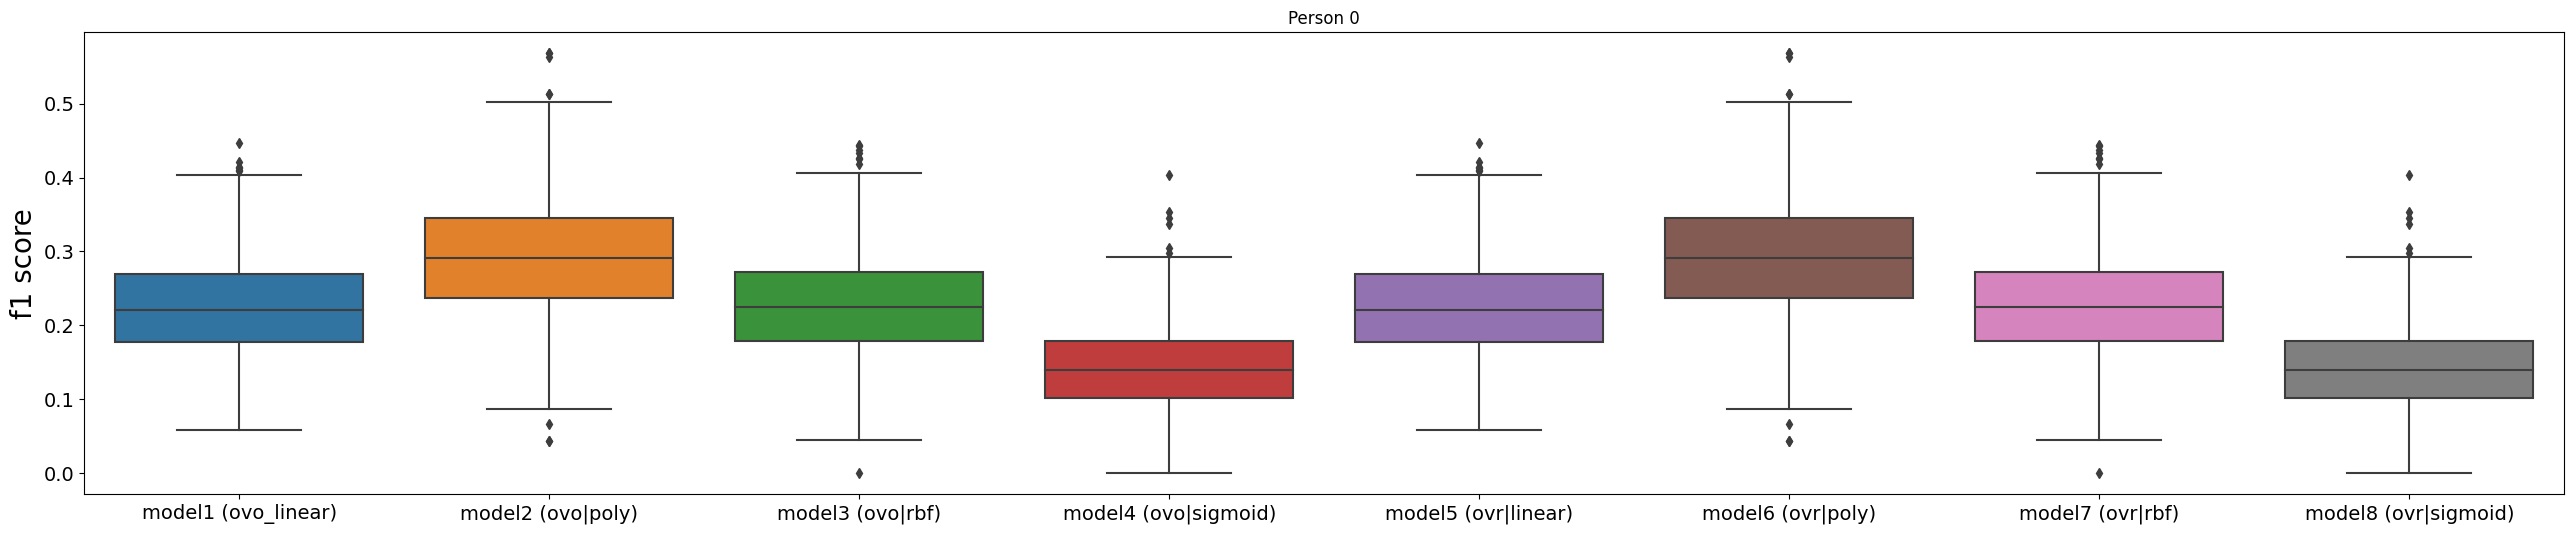

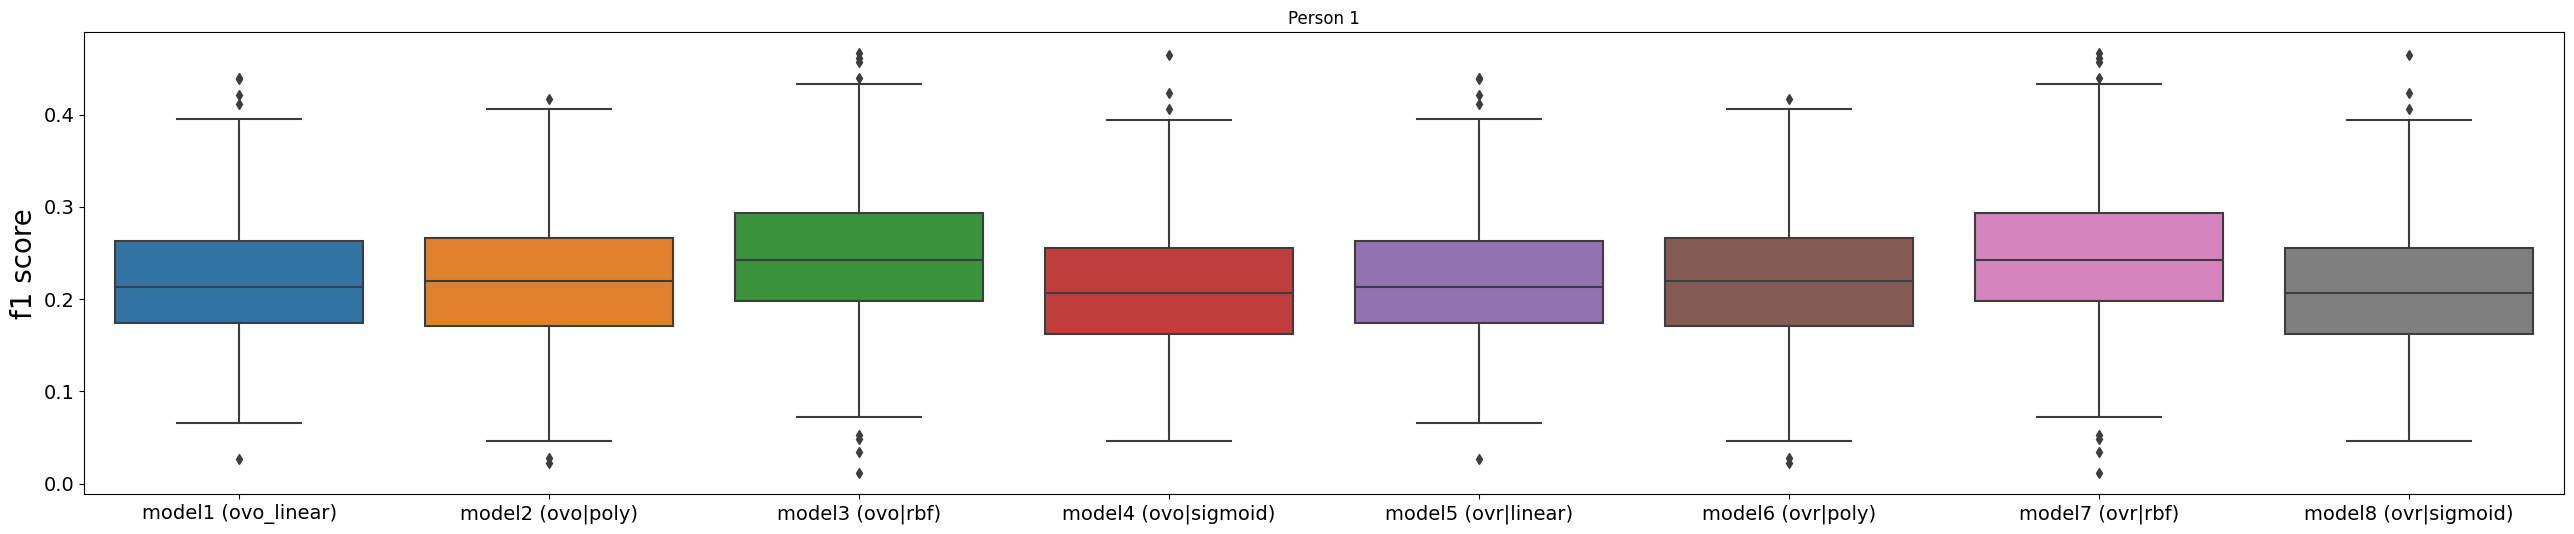

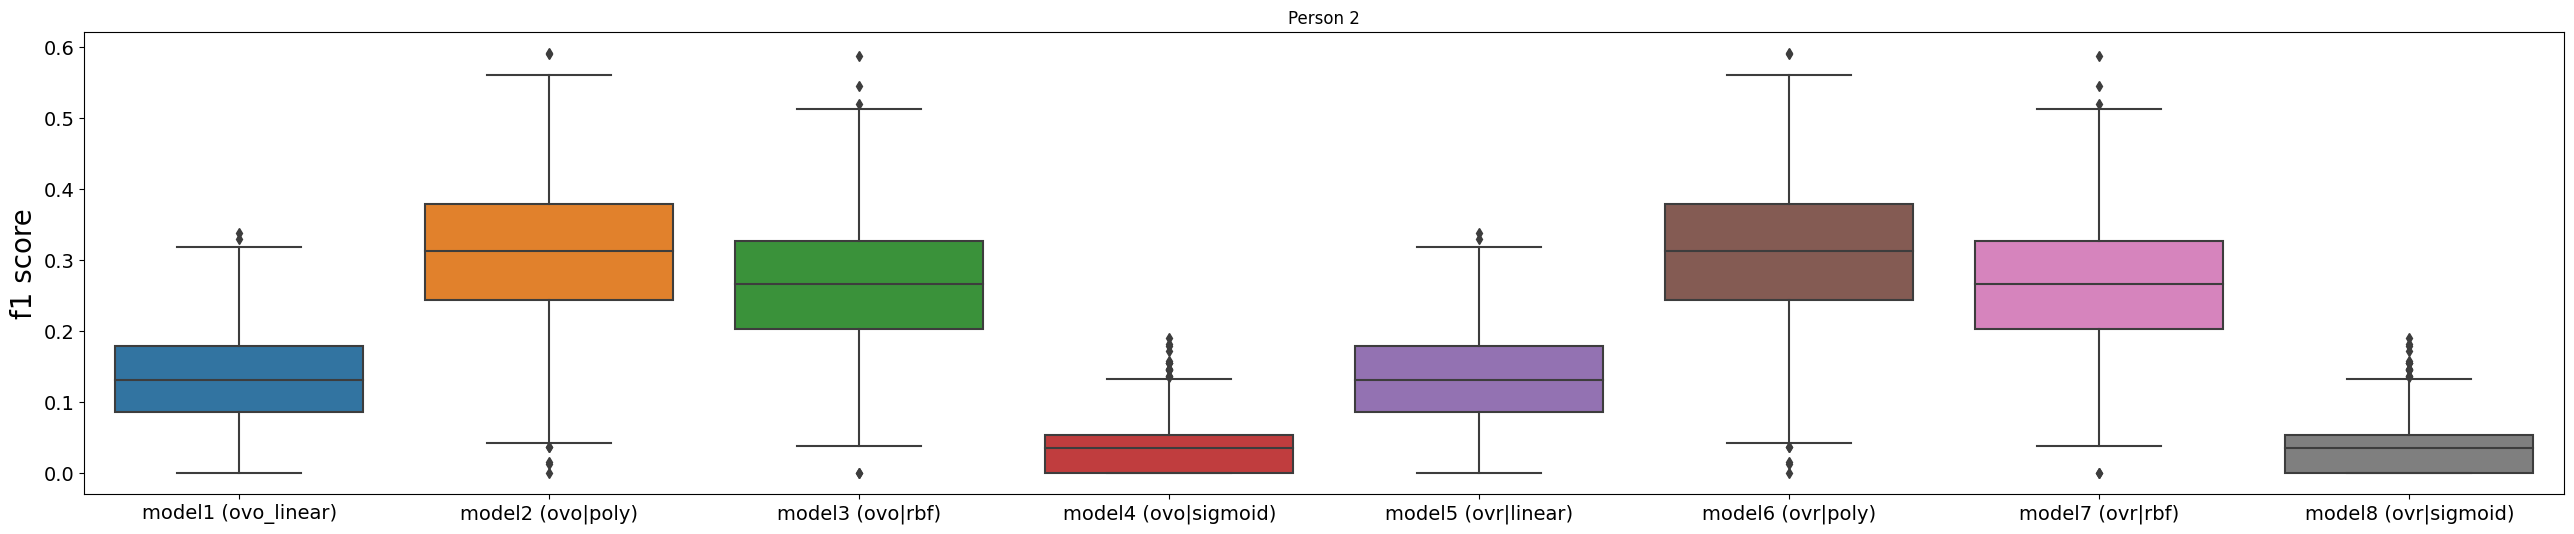

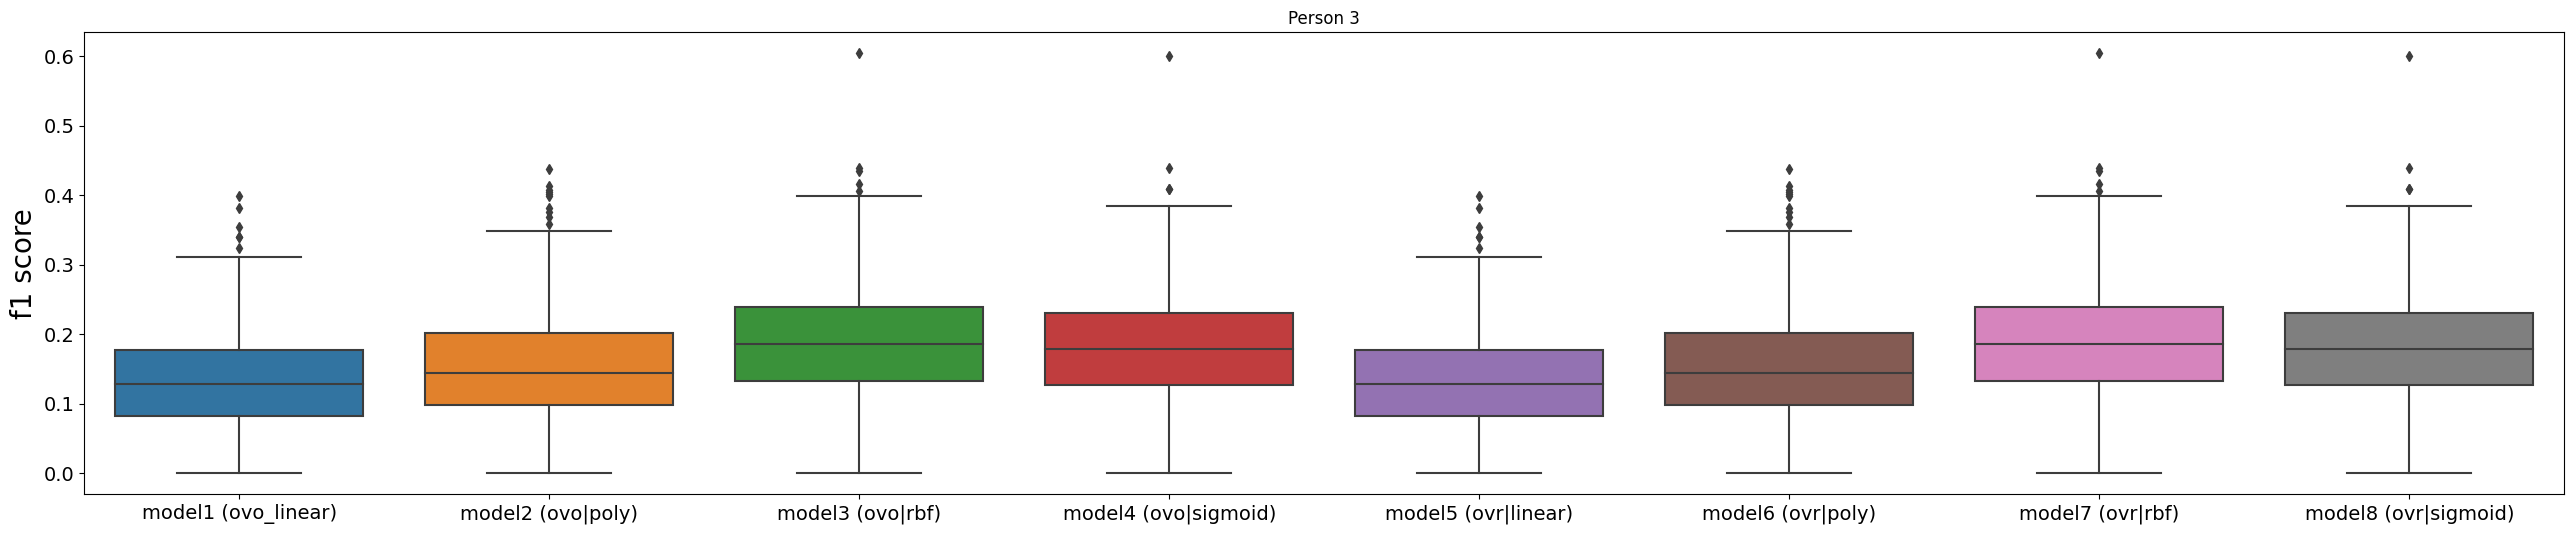

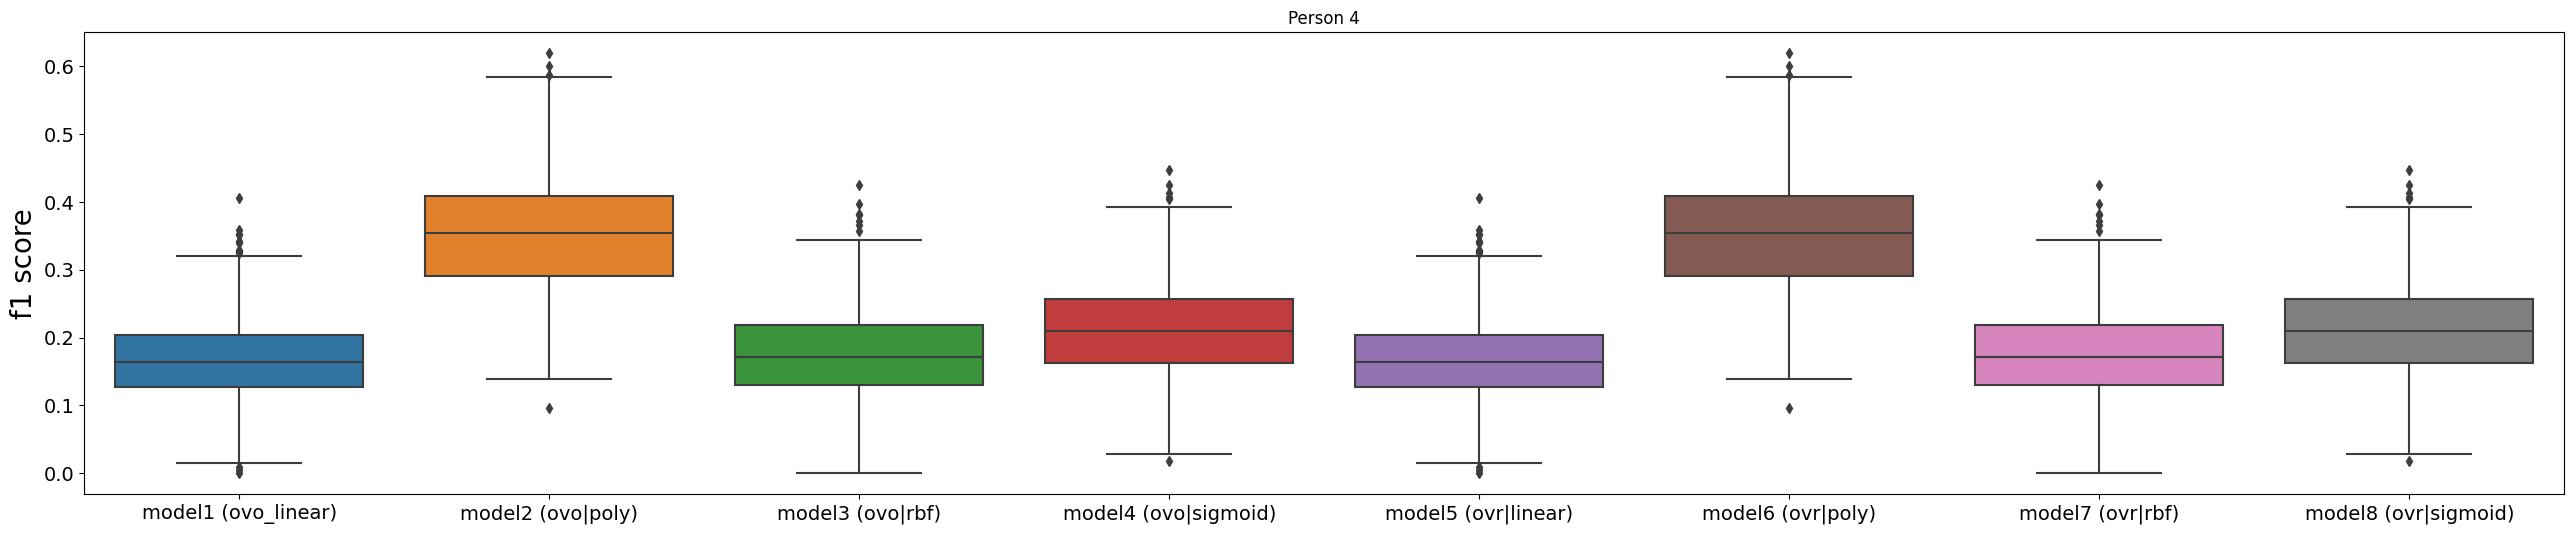

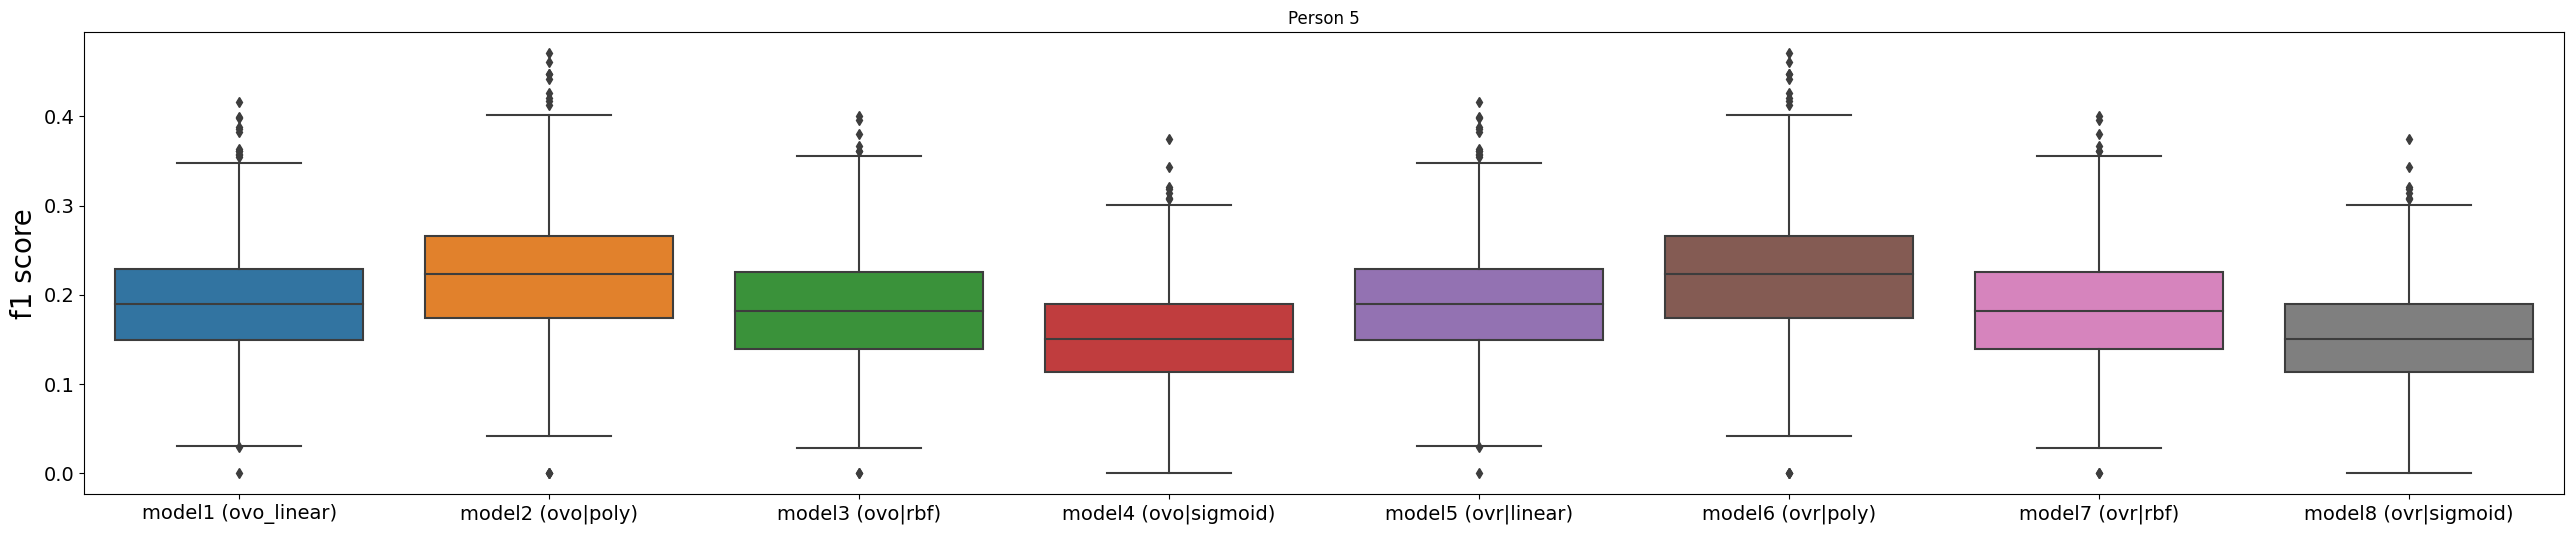

In [ ]:
import seaborn as sns

for i_person in range(6):
    plt.figure(figsize=(32, 6))
    sns.boxplot(y=np.concatenate(all_boot_f1score_m1[i_person::6]),
                x= ['model1 (ovo_linear)'] * 1000  +  ['model2 (ovo|poly)'] * 1000  + ['model3 (ovo|rbf)'] * 1000  +  ['model4 (ovo|sigmoid)'] * 1000  +  ["model5 (ovr|linear)"] * 1000  +     ['model6 (ovr|poly)'] * 1000  +    ['model7 (ovr|rbf)'] * 1000  +  ['model8 (ovr|sigmoid)'] * 1000 )

    plt.ylabel("f1 score", size=20)
    plt.title(f"Person {i_person}")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

## 4 AR

In [ ]:
file_ = myography_prosebaya_path = '/content/drive/MyDrive/Colab Notebooks/ipp-clf-eeg/phoneme_EEG_EMG_DTW_4AR.csv'
dataset = pd.read_csv(file_)

In [ ]:
columns_4 = ['DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_MAD', 'DTW_1_STD',
    'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_MAD', 'DTW_2_STD',
    'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_MAD', 'DTW_3_STD',
    'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_MAD', 'DTW_4_STD']

In [ ]:
from sklearn.metrics import f1_score

all_boot_f1score_m1  = []
for decision_function_shape in ('ovo', 'ovr'):
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        print(f'---- kernel - {kernel} | decision_function_shape - {decision_function_shape} ---- ')
        for i_person in range(6):

            X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
            X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
            y_train = python_obj[f'{i_person}']['y_train']
            y_test = np.array(python_obj[f'{i_person}']['y_test'])

            df = dataset.query(f'person_id == {i_person}')
            df.set_index("sector_id", inplace = True)
            a = df[columns]

            X_train = []
            for n in X_train_sectors:
                all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                X_train.append(all.reshape(-1))

            X_test = []
            for n in  X_test_sectors:
                all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                X_test.append(all.reshape(-1))

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            clf = SVC(kernel = kernel, decision_function_shape= decision_function_shape )
            clf.fit(X_train, y_train)
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes: 7*6/2 = 21

            clf.decision_function_shape = decision_function_shape
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes

            predicted = clf.predict(X_test)

            boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
            all_boot_f1score_m1.append(boot_f1score_m1)

            alpha = 0.10
            print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

In [ ]:
for i_person in range(6):
    plt.figure(figsize=(32, 6))
    sns.boxplot(y=np.concatenate(all_boot_f1score_m1[i_person::6]),
                x= ['model1 (ovo_linear)'] * 1000  +  ['model2 (ovo|poly)'] * 1000  + ['model3 (ovo|rbf)'] * 1000  +  ['model4 (ovo|sigmoid)'] * 1000  +  ["model5 (ovr|linear)"] * 1000  +     ['model6 (ovr|poly)'] * 1000  +    ['model7 (ovr|rbf)'] * 1000  +  ['model8 (ovr|sigmoid)'] * 1000 )

    plt.ylabel("f1 score", size=20)
    plt.title(f"Person {i_person}")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

## 8 AR

In [ ]:
file_ = myography_prosebaya_path = '/content/drive/MyDrive/Colab Notebooks/ipp-clf-eeg/phoneme_EEG_EMG_DTW_8AR.csv'
dataset = pd.read_csv(file_)

In [ ]:
columns_8 = [
          'DTW_1_AR1', 'DTW_1_AR2', 'DTW_1_AR3', 'DTW_1_AR4', 'DTW_1_AR5', 'DTW_1_AR6', 'DTW_1_AR7', 'DTW_1_AR8', 'DTW_1_MAD', 'DTW_1_STD',
          'DTW_2_AR1', 'DTW_2_AR2', 'DTW_2_AR3', 'DTW_2_AR4', 'DTW_2_AR5', 'DTW_2_AR6', 'DTW_2_AR7', 'DTW_2_AR8', 'DTW_2_MAD', 'DTW_2_STD',
          'DTW_3_AR1', 'DTW_3_AR2', 'DTW_3_AR3', 'DTW_3_AR4', 'DTW_3_AR5', 'DTW_3_AR6', 'DTW_3_AR7', 'DTW_3_AR8', 'DTW_3_MAD', 'DTW_3_STD',
          'DTW_4_AR1', 'DTW_4_AR2', 'DTW_4_AR3', 'DTW_4_AR4', 'DTW_4_AR5', 'DTW_4_AR6', 'DTW_4_AR7', 'DTW_4_AR8', 'DTW_4_MAD', 'DTW_4_STD',
          ]

In [ ]:
from sklearn.metrics import f1_score

all_boot_f1score_m1  = []
for decision_function_shape in ('ovo', 'ovr'):
    for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
        print(f'---- kernel - {kernel} | decision_function_shape - {decision_function_shape} ---- ')
        for i_person in range(6):

            X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
            X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
            y_train = python_obj[f'{i_person}']['y_train']
            y_test = np.array(python_obj[f'{i_person}']['y_test'])

            df = dataset.query(f'person_id == {i_person}')
            df.set_index("sector_id", inplace = True)
            a = df[columns]

            X_train = []
            for n in X_train_sectors:
                all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
                X_train.append(all.reshape(-1))

            X_test = []
            for n in  X_test_sectors:
                all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
                X_test.append(all.reshape(-1))

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            clf = SVC(kernel = kernel, decision_function_shape= decision_function_shape )
            clf.fit(X_train, y_train)
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes: 7*6/2 = 21

            clf.decision_function_shape = decision_function_shape
            dec = clf.decision_function(X_train)
            dec.shape[1] # 7 classes

            predicted = clf.predict(X_test)

            boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
            all_boot_f1score_m1.append(boot_f1score_m1)

            alpha = 0.10
            print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')

In [ ]:
for i_person in range(6):
    plt.figure(figsize=(32, 6))
    sns.boxplot(y=np.concatenate(all_boot_f1score_m1[i_person::6]),
                x= ['model1 (ovo_linear)'] * 1000  +  ['model2 (ovo|poly)'] * 1000  + ['model3 (ovo|rbf)'] * 1000  +  ['model4 (ovo|sigmoid)'] * 1000  +  ["model5 (ovr|linear)"] * 1000  +     ['model6 (ovr|poly)'] * 1000  +    ['model7 (ovr|rbf)'] * 1000  +  ['model8 (ovr|sigmoid)'] * 1000 )

    plt.ylabel("f1 score", size=20)
    plt.title(f"Person {i_person}")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

## SVM Poli

In [ ]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
i_person = 2

X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
y_train = python_obj[f'{i_person}']['y_train']
y_test = np.array(python_obj[f'{i_person}']['y_test'])

df = dataset.query(f'person_id == {i_person}')
df.set_index("sector_id", inplace = True)
a = df[columns]

X_train = []
for n in X_train_sectors:
    all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
    X_train.append(all.reshape(-1))

X_test = []
for n in  X_test_sectors:
    all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
    X_test.append(all.reshape(-1))

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import optuna
from optuna.samplers import RandomSampler

In [ ]:
# Define function which will optimized
def objective(trial):
    # boundaries for the optimizer's

    C = trial.suggest_float("C", 0.2, 2.5, step = 0.1)
    degree = trial.suggest_int("degree", 1, 6, step = 1)
    gamma = trial.suggest_float("gamma", 0.0005, 0.05, step = 0.005)

    # create new model(and all parameters) every iteration
    scaler = StandardScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.transform(X_test)

    clf = SVC(kernel = 'poly',
              decision_function_shape = 'ovo',
              C = C,
              degree = degree,
              gamma = gamma,
              )
    clf.fit(x_train, y_train)
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes: 7*6/2 = 21

    clf.decision_function_shape = 'ovo'
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes

    predicted = clf.predict(x_test)

    boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
    return boot_f1score_m1.mean()


In [ ]:
# Create "exploration"
study = optuna.create_study(
    direction="maximize", study_name="Optimizer", sampler=RandomSampler(42)
)

study.optimize(
    objective, n_trials=100
)  # The more iterations, the higher the chances of catching the most optimal hyperparameters

[I 2023-11-21 13:42:27,516] A new study created in memory with name: Optimizer
[I 2023-11-21 13:42:31,311] Trial 0 finished with value: 0.2165764660054133 and parameters: {'C': 1.0, 'degree': 6, 'gamma': 0.035500000000000004}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:34,033] Trial 1 finished with value: 0.2076612317455723 and parameters: {'C': 1.6, 'degree': 1, 'gamma': 0.0055}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:35,903] Trial 2 finished with value: 0.2165764660054133 and parameters: {'C': 0.30000000000000004, 'degree': 6, 'gamma': 0.0305}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:37,101] Trial 3 finished with value: 0.17434533756687956 and parameters: {'C': 1.8, 'degree': 1, 'gamma': 0.0455}. Best is trial 0 with value: 0.2165764660054133.
[I 2023-11-21 13:42:38,318] Trial 4 finished with value: 0.24193598535207533 and parameters: {'C': 2.1, 'degree': 2, 'gamma': 0.0055}. Best is trial 4 with value:

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
params = ["C", "degree", "gamma"]
optuna.visualization.plot_slice(study, params=params, target_name="f1_score")

In [ ]:
study.best_params

In [ ]:
def mySVCpoly(X_train, X_test, y_train, best_params):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(X_train)
    x_test = scaler.transform(X_test)

    clf = SVC(kernel = "poly",
              decision_function_shape = best_params['decision_function_shape'],
              C = best_params['C'],
              degree = best_params['degree'],
              gamma = best_params['gamma'],
              )
    clf.fit(x_train, y_train)
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes: 7*6/2 = 21

    clf.decision_function_shape = best_params['decision_function_shape']
    dec = clf.decision_function(x_train)
    dec.shape[1] # 7 classes

    return clf.predict(x_test)

In [ ]:
def get_all_boot_f1score_m1(columns_ , file_):

    dataset = pd.read_csv(file_)

    all_boot_f1score_m1 = []

    for i_person in range(6):
        X_train_sectors = python_obj[f'{i_person}']['X_train_sectors']
        X_test_sectors = python_obj[f'{i_person}']['X_test_sectors']
        y_train = python_obj[f'{i_person}']['y_train']
        y_test = np.array(python_obj[f'{i_person}']['y_test'])

        df = dataset.query(f'person_id == {i_person}')
        df.set_index("sector_id", inplace = True)
        a = df[columns_]

        X_train = []
        for n in X_train_sectors:
            all = a.loc[X_train_sectors].query(f'sector_id == {n}').values
            X_train.append(all.reshape(-1))

        X_test = []
        for n in  X_test_sectors:
            all = a.loc[X_test_sectors].query(f'sector_id == {n}').values
            X_test.append(all.reshape(-1))

        best_params = {'decision_function_shape': 'ovr', 'C': 2, 'degree': 3, 'gamma': 0.01}

        predicted = mySVCpoly(X_train, X_test,  y_train, best_params )

        boot_f1score_m1 = bootstrap_metric(predicted, y_test, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y, average='weighted'))
        all_boot_f1score_m1.append(boot_f1score_m1)

        alpha = 0.10
        print(f'Испытуемый {i_person}: F1 score - {np.quantile(boot_f1score_m1, q=[alpha/2, 1 - alpha/2])}')
    return all_boot_f1score_m1

In [ ]:
all_boot_f1score_EEG_EMG_DTW_8AR = get_all_boot_f1score_m1(columns_8, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_EMG_DTW_8AR.csv')

Испытуемый 0: F1 score - [0.05690156 0.25231961]
Испытуемый 1: F1 score - [0.06167749 0.26490596]
Испытуемый 2: F1 score - [0.0552765  0.31880169]
Испытуемый 3: F1 score - [0.06119898 0.32512315]
Испытуемый 4: F1 score - [0.07957377 0.29995493]
Испытуемый 5: F1 score - [0.03655648 0.2393604 ]


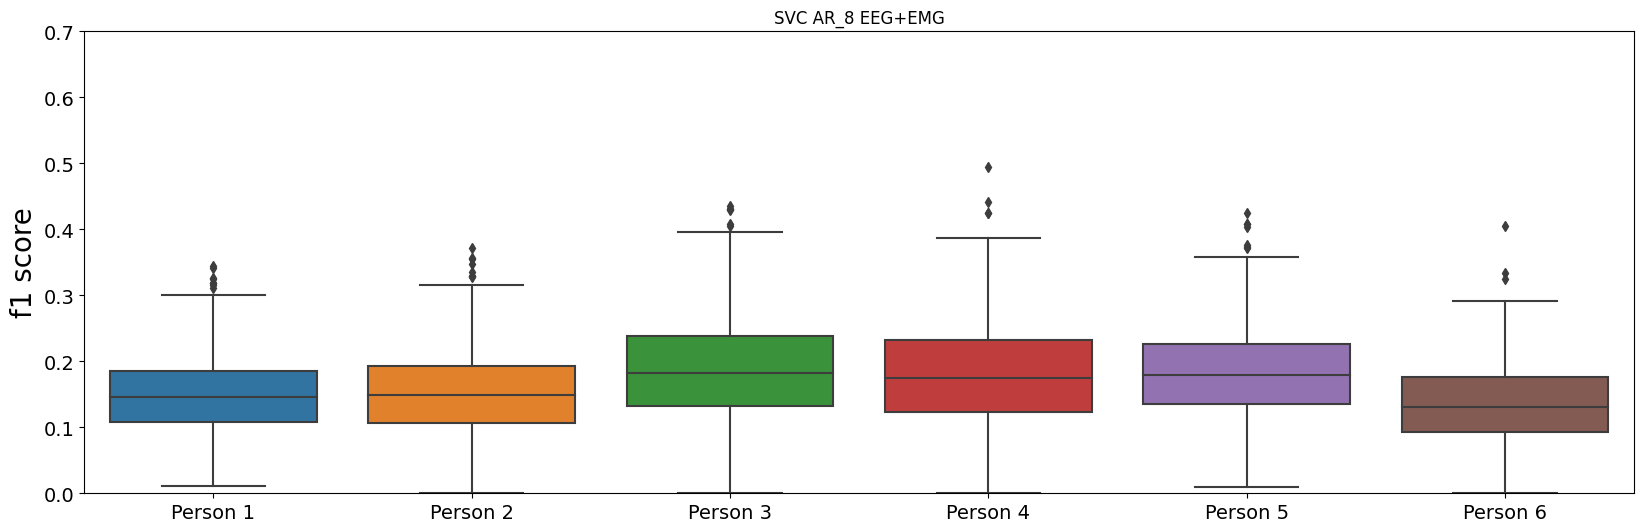

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_EMG_DTW_8AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +  ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_8 EEG+EMG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [ ]:
all_boot_f1score_EEG_EMG_DTW_6AR = get_all_boot_f1score_m1(columns_6, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_EMG_DTW_6AR.csv')

Испытуемый 0: F1 score - [0.11583953 0.35836407]
Испытуемый 1: F1 score - [0.07724488 0.29193461]
Испытуемый 2: F1 score - [0.0591281  0.34260289]
Испытуемый 3: F1 score - [0.06011905 0.3175873 ]
Испытуемый 4: F1 score - [0.07635284 0.30658866]
Испытуемый 5: F1 score - [0.05838509 0.26267494]


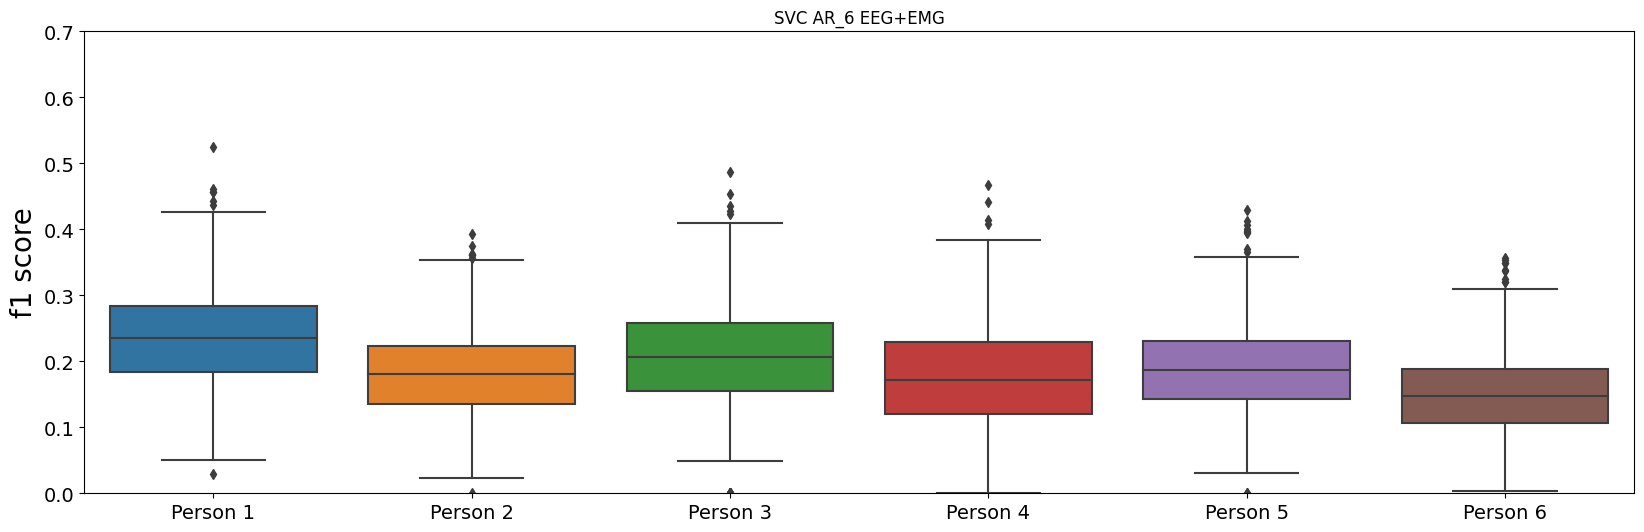

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_EMG_DTW_6AR ),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_6 EEG+EMG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [ ]:
all_boot_f1score_EEG_EMG_DTW_4AR = get_all_boot_f1score_m1(columns_4, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_EMG_DTW_4AR.csv')

Испытуемый 0: F1 score - [0.11073413 0.33307163]
Испытуемый 1: F1 score - [0.04025433 0.2303168 ]
Испытуемый 2: F1 score - [0.0712596  0.34414747]
Испытуемый 3: F1 score - [0.06818182 0.38709677]
Испытуемый 4: F1 score - [0.03878116 0.24832607]
Испытуемый 5: F1 score - [0.03186407 0.19908467]


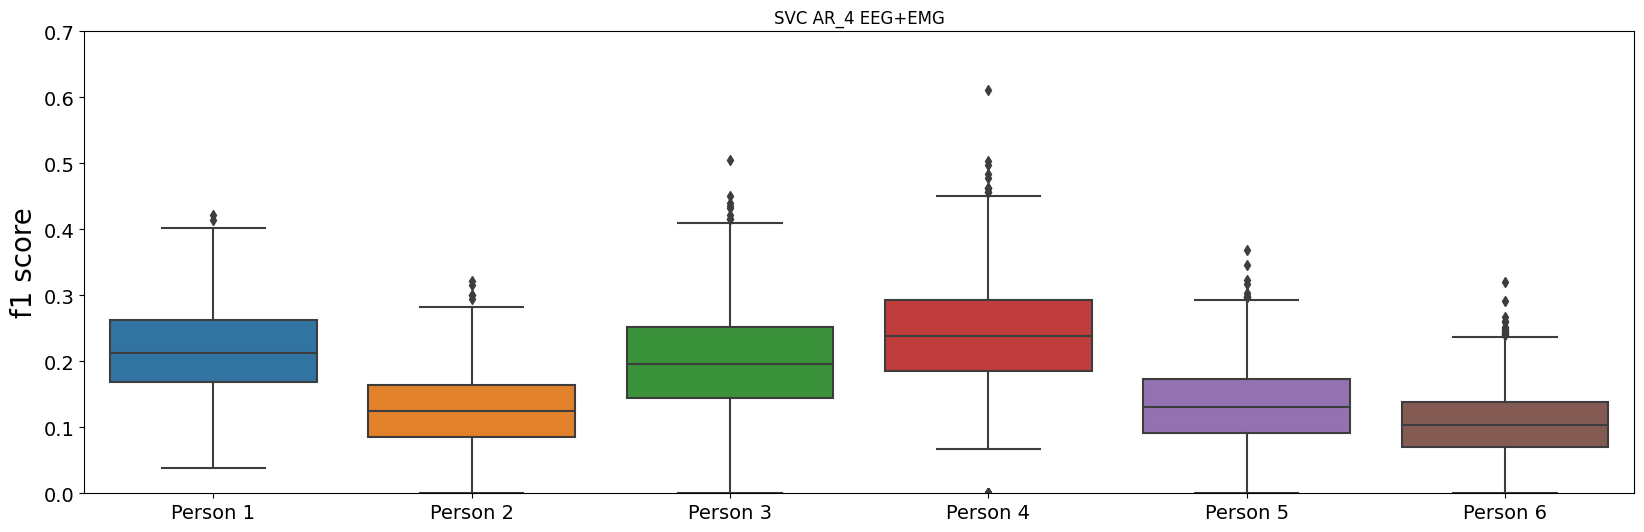

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_EMG_DTW_4AR ),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_4 EEG+EMG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [ ]:
all_boot_f1score_EEG_DTW_8AR = get_all_boot_f1score_m1(columns_8, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_DTW_8AR.csv')

Испытуемый 0: F1 score - [0.07328446 0.28746929]
Испытуемый 1: F1 score - [0.15031013 0.3868164 ]
Испытуемый 2: F1 score - [0.10481951 0.39102813]
Испытуемый 3: F1 score - [0.01767857 0.27860837]
Испытуемый 4: F1 score - [0.09021987 0.35022835]
Испытуемый 5: F1 score - [0.08764249 0.30964887]


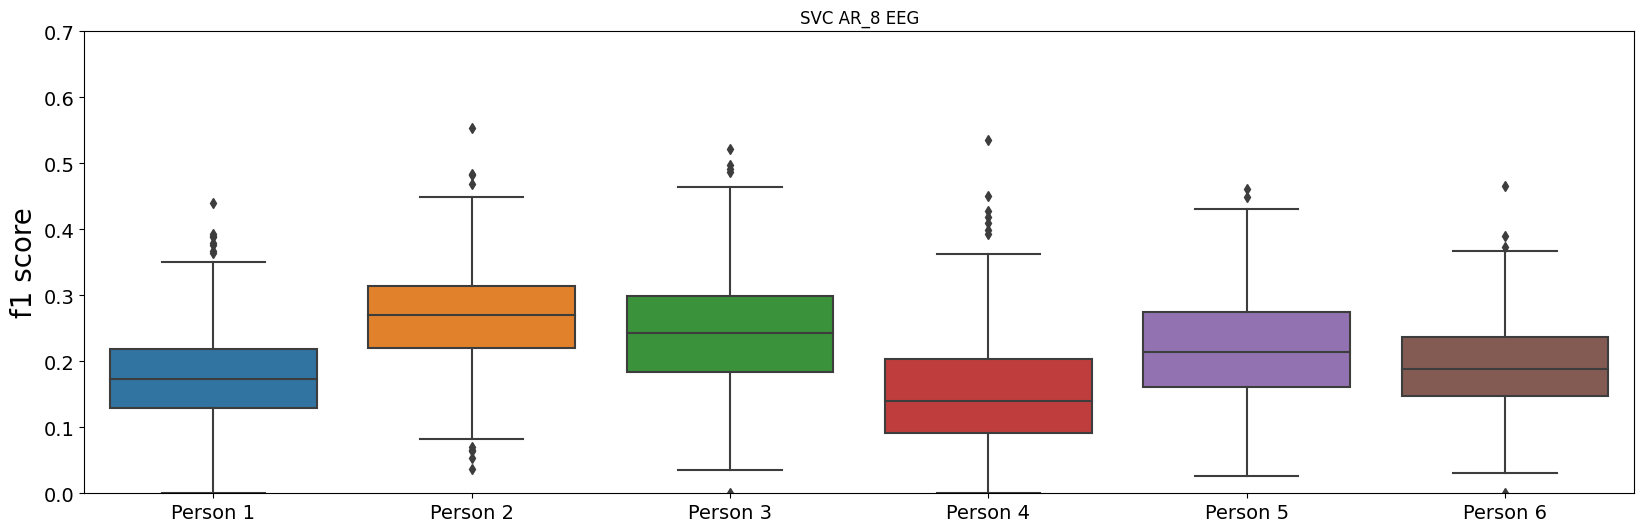

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_DTW_8AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_8 EEG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [ ]:
all_boot_f1score_EEG_DTW_4AR = get_all_boot_f1score_m1(columns_4, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_DTW_4AR.csv')

Испытуемый 0: F1 score - [0.14831081 0.38793195]
Испытуемый 1: F1 score - [0.04038919 0.23386107]
Испытуемый 2: F1 score - [0.07316413 0.35582297]
Испытуемый 3: F1 score - [0.06857143 0.39393939]
Испытуемый 4: F1 score - [0.05192669 0.26074428]
Испытуемый 5: F1 score - [0.10729982 0.33957324]


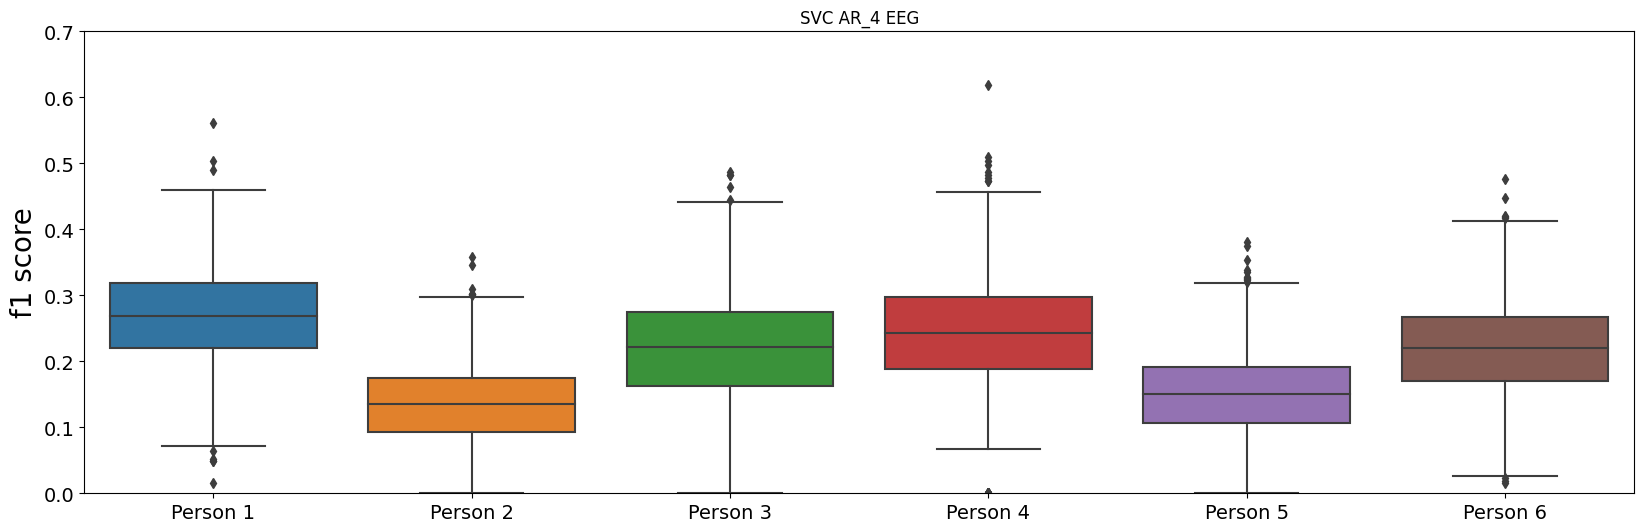

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_DTW_4AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_4 EEG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [ ]:
all_boot_f1score_EEG_DTW_6AR = get_all_boot_f1score_m1(columns_6, file_ = '/content/drive/MyDrive/Colab_Notebooks/ipp-clf-eeg/phoneme_EEG_DTW_6AR.csv')

Испытуемый 0: F1 score - [0.13336497 0.35036759]
Испытуемый 1: F1 score - [0.12879048 0.35488409]
Испытуемый 2: F1 score - [0.16831108 0.48512407]
Испытуемый 3: F1 score - [0.01428571 0.22809961]
Испытуемый 4: F1 score - [0.14751301 0.41973997]
Испытуемый 5: F1 score - [0.1121866  0.35402401]


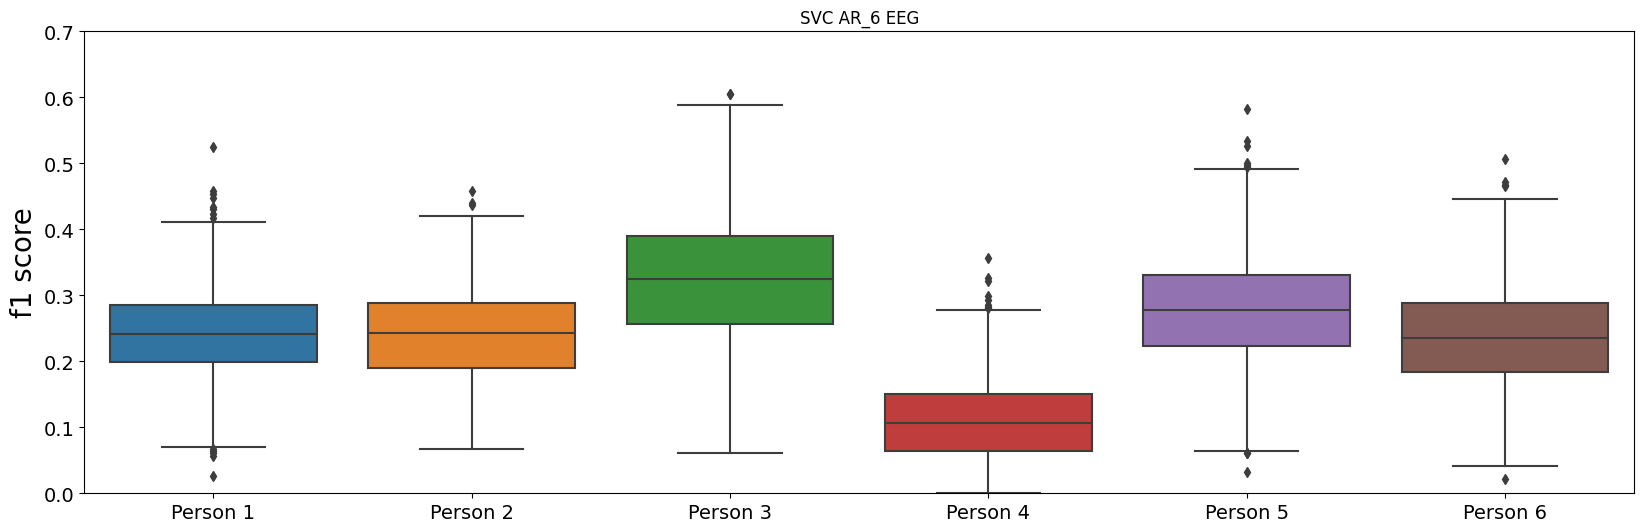

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=np.concatenate(all_boot_f1score_EEG_DTW_6AR),
            x= ['Person 1'] * 1000  +  ['Person 2'] * 1000  + ['Person 3'] * 1000  +  ['Person 4'] * 1000  +  ["Person 5"] * 1000  +     ['Person 6'] * 1000  )

plt.ylabel("f1 score", size=20)
plt.title(f"SVC AR_6 EEG")
plt.ylim(0, 0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [ ]:
[round(round(np.mean(i), 3)*100,1) for i in all_boot_f1score_EEG_DTW_4AR]

[26.8, 13.6, 22.0, 23.4, 15.3, 22.0]

In [ ]:
np.mean([round(round(np.mean(i), 3)*100,1) for i in all_boot_f1score_EEG_DTW_6AR])

23.900000000000002

In [ ]:
[round(round(np.mean(i), 3)*100,1) for i in all_boot_f1score_EEG_DTW_8AR]

[17.5, 26.8, 24.3, 14.7, 21.7, 19.2]

In [ ]:
[round(round(np.mean(i), 3)*100,1) for i in all_boot_f1score_EEG_EMG_DTW_4AR]

[21.6, 12.7, 20.0, 23.1, 13.4, 10.4]

In [ ]:
np.mean([round(round(np.mean(i), 3)*100,1) for i in all_boot_f1score_EEG_EMG_DTW_6AR])

18.8

In [ ]:
[round(round(np.mean(i), 3)*100,1) for i in all_boot_f1score_EEG_EMG_DTW_8AR]

[15.0, 15.4, 18.4, 17.2, 18.3, 13.4]